# LetsGrowMore Virtual Internship
## Data Science Internship Program (October 2021)
## Beginner level task:- Music Recommendation
### Author:- Pratik Borle

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("D:\\kkbox-music-recommendation-challenge\\train1.csv")

In [3]:
df.head(6)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1


In [4]:
df.shape

(7377418, 6)

In [5]:
df = df.sample(frac=0.1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 4232159 to 4306878
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                737742 non-null  object
 1   song_id             737742 non-null  object
 2   source_system_tab   735315 non-null  object
 3   source_screen_name  696057 non-null  object
 4   source_type         735637 non-null  object
 5   target              737742 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 39.4+ MB


In [7]:
songs = pd.read_csv('D:\\lgm\\Music recommendation\\songs.csv')

In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [9]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                737742 non-null  object 
 1   song_id             737742 non-null  object 
 2   source_system_tab   735315 non-null  object 
 3   source_screen_name  696057 non-null  object 
 4   source_type         735637 non-null  object 
 5   target              737742 non-null  int64  
 6   song_length         737728 non-null  float64
 7   genre_ids           725873 non-null  object 
 8   artist_name         737728 non-null  object 
 9   composer            570614 non-null  object 
 10  lyricist            420068 non-null  object 
 11  language            737725 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 73.2+ MB


In [11]:
members = pd.read_csv('D:\\kkbox-music-recommendation-challenge\\members.csv')

In [12]:
df = pd.merge(df, members, on='msno', how='left')
del members

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    737742 non-null  object 
 1   song_id                 737742 non-null  object 
 2   source_system_tab       735315 non-null  object 
 3   source_screen_name      696057 non-null  object 
 4   source_type             735637 non-null  object 
 5   target                  737742 non-null  int64  
 6   song_length             737728 non-null  float64
 7   genre_ids               725873 non-null  object 
 8   artist_name             737728 non-null  object 
 9   composer                570614 non-null  object 
 10  lyricist                420068 non-null  object 
 11  language                737725 non-null  float64
 12  city                    737742 non-null  int64  
 13  bd                      737742 non-null  int64  
 14  gender              

In [14]:
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    737742 non-null  object 
 1   song_id                 737742 non-null  object 
 2   source_system_tab       737742 non-null  object 
 3   source_screen_name      737742 non-null  object 
 4   source_type             737742 non-null  object 
 5   target                  737742 non-null  int64  
 6   song_length             737742 non-null  float64
 7   genre_ids               737742 non-null  object 
 8   artist_name             737742 non-null  object 
 9   composer                737742 non-null  object 
 10  lyricist                737742 non-null  object 
 11  language                737742 non-null  float64
 12  city                    737742 non-null  int64  
 13  bd                      737742 non-null  int64  
 14  gender              

In [16]:
# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [17]:
#Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [18]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [19]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.000647,0.008141,-0.005828,-0.001674,-0.000427,0.003404,0.002600,0.004043,0.005658,...,-0.007053,-0.002480,0.005380,0.010844,0.004624,0.011318,0.010746,0.002733,0.008317,0.000696
song_id,-0.000647,1.000000,-0.004493,0.002691,0.005420,-0.003574,-0.010981,0.006603,-0.020493,-0.034508,...,-0.000250,-0.001638,-0.000156,-0.002359,-0.000079,-0.000797,-0.000128,-0.001685,0.000579,-0.001316
source_system_tab,0.008141,-0.004493,1.000000,-0.032875,-0.080470,0.032028,0.023983,0.037685,0.036253,0.056153,...,-0.025344,0.034403,-0.042775,0.057404,-0.038790,-0.016166,0.003821,0.039595,0.012848,0.007905
source_screen_name,-0.005828,0.002691,-0.032875,1.000000,0.415246,-0.055525,0.025792,-0.018218,0.009925,0.019751,...,0.018231,-0.031388,0.038976,-0.034772,0.037357,0.005814,-0.004276,-0.024297,-0.007264,-0.000579
source_type,-0.001674,0.005420,-0.080470,0.415246,1.000000,-0.124611,0.016600,-0.050485,-0.020124,-0.003217,...,0.022794,-0.025187,0.033753,-0.045577,0.031795,0.006552,0.000351,-0.036766,-0.000873,-0.004358
target,-0.000427,-0.003574,0.032028,-0.055525,-0.124611,1.000000,-0.001198,0.016137,0.013513,0.001429,...,-0.012072,0.009555,-0.001998,0.056808,-0.000992,-0.006695,-0.000083,0.040388,0.011280,0.003735
song_length,0.003404,-0.010981,0.023983,0.025792,0.016600,-0.001198,1.000000,0.028611,0.116102,0.100749,...,0.003830,0.002439,-0.006491,0.005437,-0.006690,0.002003,-0.001361,0.002496,0.002009,0.000789
genre_ids,0.002600,0.006603,0.037685,-0.018218,-0.050485,0.016137,0.028611,1.000000,0.196865,0.146443,...,-0.005041,0.002752,-0.000815,0.004864,-0.001534,0.004041,0.000970,0.004737,-0.004278,0.001761
artist_name,0.004043,-0.020493,0.036253,0.009925,-0.020124,0.013513,0.116102,0.196865,1.000000,0.340990,...,-0.000781,0.001108,-0.007383,0.009938,-0.007766,0.005019,-0.001400,0.006557,0.001869,0.001578
composer,0.005658,-0.034508,0.056153,0.019751,-0.003217,0.001429,0.100749,0.146443,0.340990,1.000000,...,-0.001411,0.001020,-0.004892,0.005981,-0.005330,0.005526,-0.000487,0.003661,0.002264,-0.001776


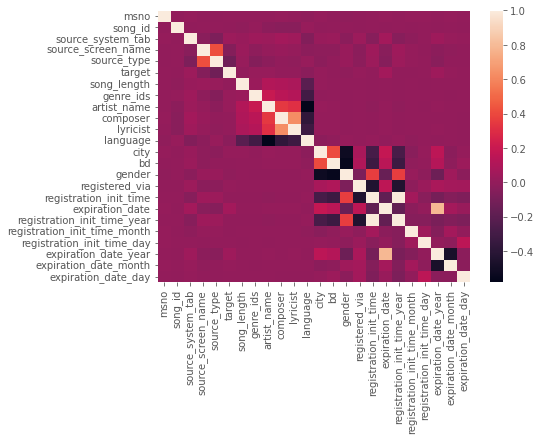

In [20]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

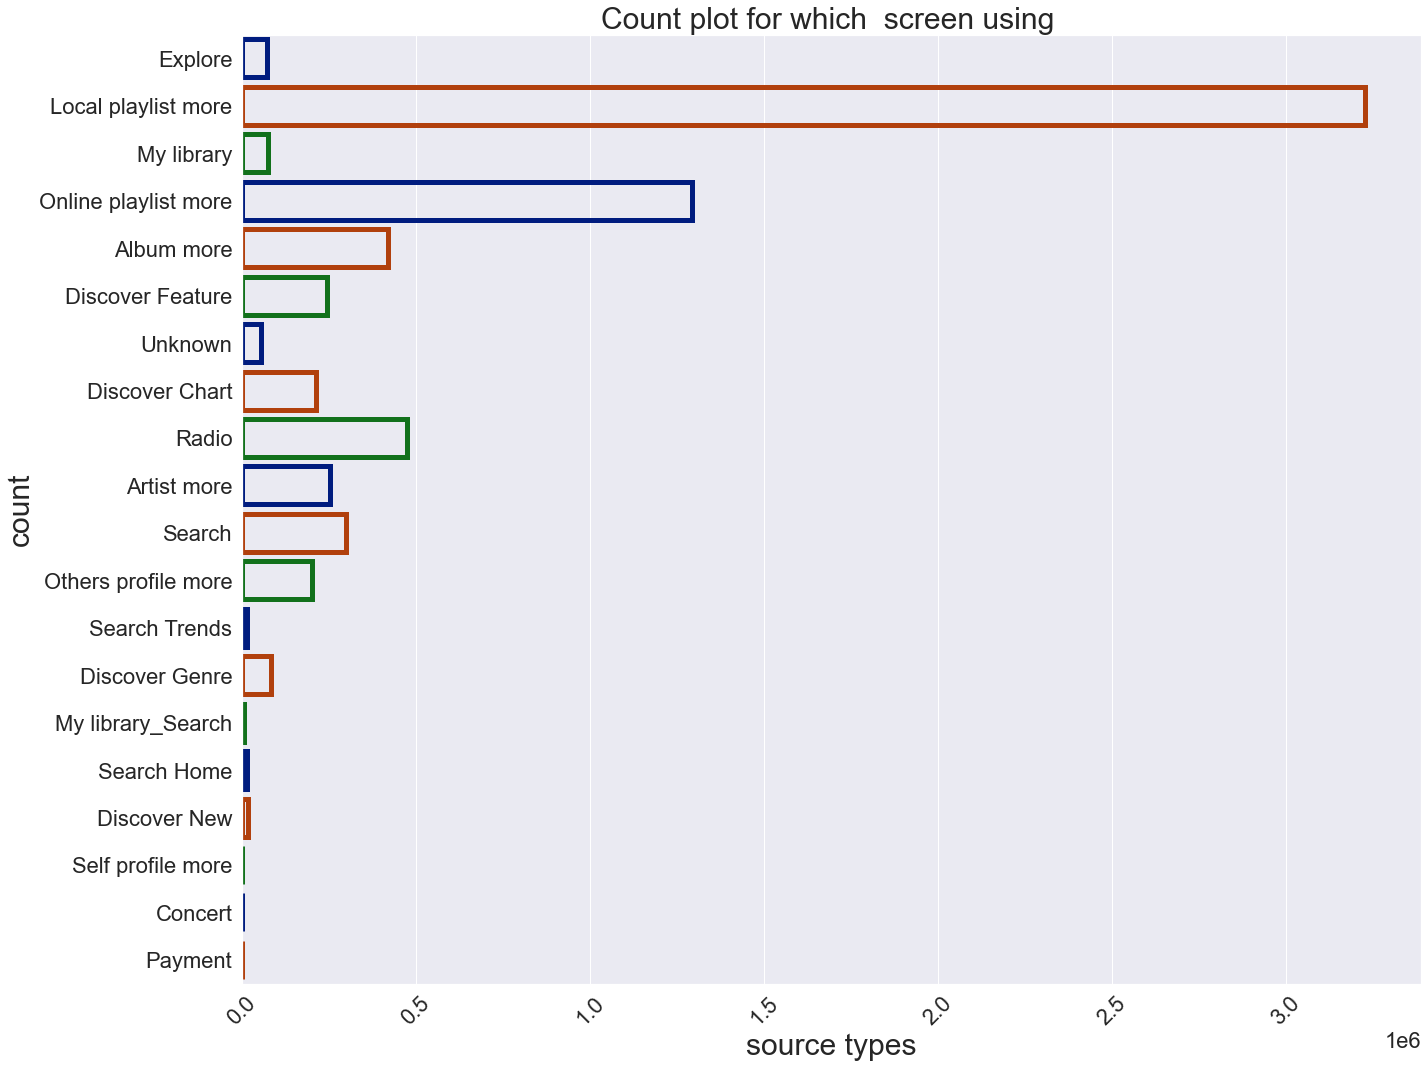

In [21]:
tra = pd.read_csv('D:\\kkbox-music-recommendation-challenge\\train1.csv')
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=tra,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for which  screen using ',fontsize=30)
plt.tight_layout()

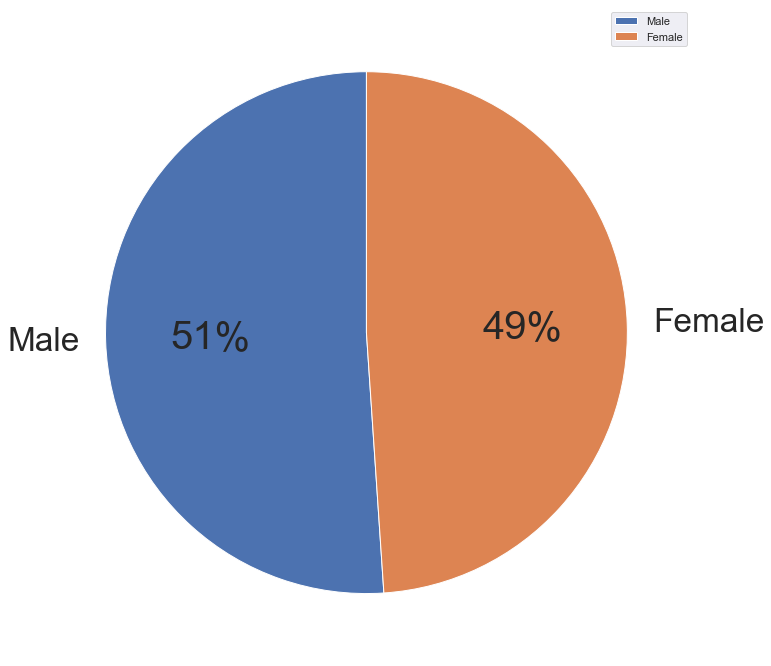

In [22]:
import matplotlib as mpl
members = pd.read_csv('D:\\kkbox-music-recommendation-challenge\\members.csv')

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()


In [23]:
# Model with the best estimator

model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [24]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

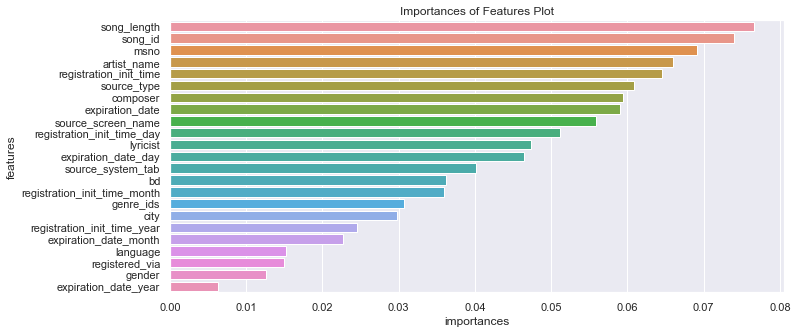

In [25]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [26]:
model.feature_importances_

array([0.06915116, 0.07403027, 0.04008323, 0.05592153, 0.06092522,
       0.07664982, 0.0307514 , 0.06598567, 0.05947913, 0.0474199 ,
       0.01521535, 0.02972626, 0.03623618, 0.0125926 , 0.01492597,
       0.06459214, 0.05902824, 0.02458117, 0.03595522, 0.05118474,
       0.00637193, 0.02276167, 0.04643118])

In [27]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [28]:
list(df.columns)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

In [29]:
target = df.pop('target')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

[17:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=15, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67    110120
           1       0.67      0.70      0.68    111203

    accuracy                           0.67    221323
   macro avg       0.67      0.67      0.67    221323
weighted avg       0.67      0.67      0.67    221323



# Thank You 